# Chapter 4: Training Models

**Tujuan:** Memahami cara melatih model regresi (linear, polinomial), optimasi (Gradient Descent), kurva pembelajaran, dan regularisasi. Juga perkenalan Logistic Regression.

---

## 1. Linear Regression

Model linier:


$\hat{y} = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n$


Cari \$\theta\$ yang meminimalkan MSE:

$
J(\theta) = \frac{1}{m}\sum_{i=1}^m (\hat y^{(i)} - y^{(i)})^2
$

Dua cara menghitung \$\theta\$:

* **Normal Equation:**

  $
  \theta = (X^T X)^{-1} X^T y
  $

* **Gradient Descent (iteratif):**

  $
  \theta := \theta - \alpha \nabla J(\theta)
  $

---

## 2. Gradient Descent

* **Batch GD**: pakai semua data tiap update
* **Stochastic GD**: satu instance per update
* **Mini‑batch GD**: sebagian data per update

Pilih learning rate \$\alpha\$ dengan hati‑hati:

* \$\alpha\$ terlalu besar → divergen
* \$\alpha\$ terlalu kecil → lambat

---

## 3. Polynomial Regression

Tingkatkan kompleksitas model dengan menambahkan fitur polinomial:

$
x \rightarrow (1, x, x^2, \dots, x^d)
$

---

## 4. Learning Curves

Plot **training error** & **validation error** vs ukuran data.

* **Overfitting**: training error rendah, validasi tinggi
* **Underfitting**: keduanya tinggi

---

## 5. Regularization

Tambahkan penalty ke cost function untuk mencegah overfit:

* **Ridge (L2):**

  $
  J(\theta) + \alpha \sum \theta_j^2
  $

* **Lasso (L1):**

  $
  J(\theta) + \alpha \sum |\theta_j|
  $

---

## 6. Logistic Regression (pengenalan)

Model untuk **classification** biner:

$
h_\theta(x) = \sigma(\theta^T x), \quad \sigma(z) = \frac{1}{1 + e^{-z}}
$

Loss: **log loss**

---

In [1]:
# Setup umum
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, accuracy_score

# Buat dataset sintetis: y = 4 + 3x + noise
rng = np.random.RandomState(42)
X = 2 * rng.rand(100,1)
y = 4 + 3*X[:,0] + rng.randn(100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 1. Linear Regression dengan Normal Equation

Coefficients: [2.72587297] Intercept: 4.168788154078728
RMSE: 0.707061195070344


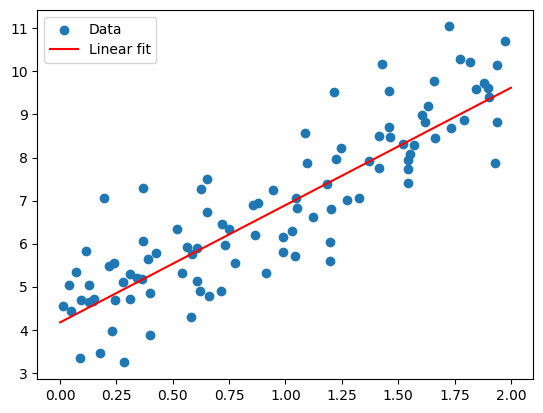

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Coefficients:", lin_reg.coef_, "Intercept:", lin_reg.intercept_)
print("RMSE:", mean_squared_error(y_test, y_pred))

# Visualisasi
plt.scatter(X, y, label="Data")
x_line = np.linspace(0,2,100).reshape(100,1)
plt.plot(x_line, lin_reg.predict(x_line), "r-", label="Linear fit")
plt.legend()
plt.show()

## 2. Gradient Descent (SGDRegressor sebagai contoh)

In [4]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1, penalty=None, random_state=42)
sgd_reg.fit(X_train, y_train)
print("SGD Coef:", sgd_reg.coef_, "Intercept:", sgd_reg.intercept_)

SGD Coef: [2.74583225] Intercept: [4.13736711]


## 3. Polynomial Regression (degree 3)

In [6]:
poly_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly_pipeline.fit(X_train, y_train)
y_poly_pred = poly_pipeline.predict(X_test)
print("RMSE (poly deg=3):", mean_squared_error(y_test, y_poly_pred))

RMSE (poly deg=3): 0.6458866661838252


## 4. Learning Curves

Learning curve: Linear Regression


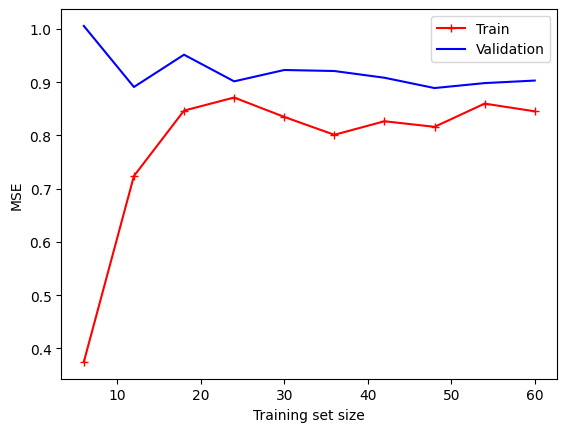

Learning curve: Polynomial Regression deg=10


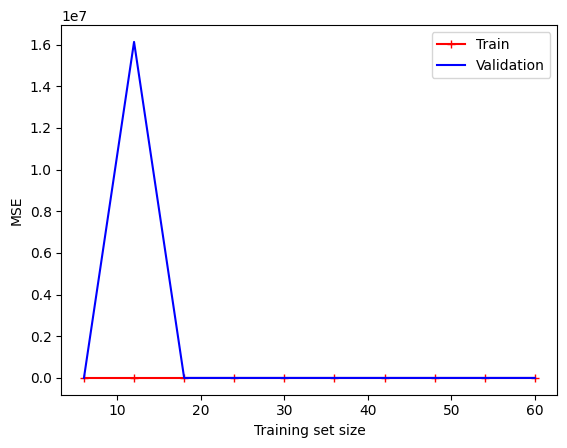

In [7]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5,
        train_sizes=np.linspace(0.1,1.0,10), scoring="neg_mean_squared_error"
    )
    train_errors = -train_scores.mean(axis=1)
    val_errors   = -val_scores.mean(axis=1)
    plt.plot(train_sizes, train_errors, "r-+", label="Train")
    plt.plot(train_sizes, val_errors, "b-", label="Validation")
    plt.xlabel("Training set size")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

print("Learning curve: Linear Regression")
plot_learning_curve(LinearRegression(), X_train, y_train)

print("Learning curve: Polynomial Regression deg=10")
plot_learning_curve(Pipeline([
    ("poly", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
]), X_train, y_train)

## 5. Regularization: Ridge & Lasso

In [9]:
# Ridge
ridge_reg = Ridge(alpha=1, solver="auto")
ridge_reg.fit(X_train, y_train)
print("Ridge RMSE:", mean_squared_error(y_test, ridge_reg.predict(X_test)))

# Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
print("Lasso RMSE:", mean_squared_error(y_test, lasso_reg.predict(X_test)))

Ridge RMSE: 0.7284121601086742
Lasso RMSE: 0.7992315675731249


## 6. Logistic Regression (contoh sederhana)

Kita gunakan dataset sintetis: dua klaster Gaussian.

Accuracy: 0.88


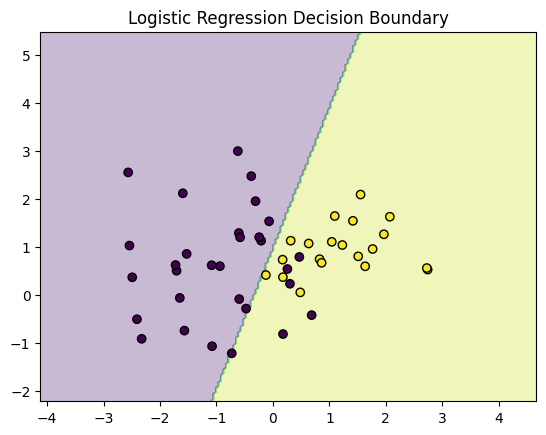

In [12]:
# Buat data biner
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

X_cls, y_cls = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1, random_state=42)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, random_state=42)

# Latih Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(Xc_train, yc_train)
yc_pred = log_reg.predict(Xc_test)
print("Accuracy:", accuracy_score(yc_test, yc_pred))

# Visualisasi decision boundary
xx, yy = np.meshgrid(np.linspace(X_cls[:, 0].min() - 1, X_cls[:, 0].max() + 1, 200),
                     np.linspace(X_cls[:, 1].min() - 1, X_cls[:, 1].max() + 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = log_reg.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(Xc_test[:,0], Xc_test[:,1], c=yc_test, edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.show()